In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os

PROCESS RAW DATA

In [6]:
file_path = "benchmark_raw_results.csv"  # replace with your file path
agg_df = pd.read_csv(file_path, sep=';')

# Replace comma with dot for numeric columns and convert to float
numeric_cols = ['execution_time_ms', 'memory_usage_mb']
for col in numeric_cols:
    agg_df[col] = agg_df[col].str.replace(',', '.').astype(float)

agg_df

,run_id,matrix_size,sparse_level_percent,implementation,execution_time_ms,memory_usage_mb,repetition,timestamp,warm-up,notes
0,run_40daf4db,64,0,unoptimized,2.902,0.960,1,2025-11-11T01:44:10.0998009,1,No notes
1,run_c224400d,64,0,unoptimized,0.647,0.160,2,2025-11-11T01:44:10.1156902,1,No notes
2,run_9e1b7a82,64,0,unoptimized,0.655,0.041,3,2025-11-11T01:44:10.1156902,1,No notes
3,run_36a4f3b6,64,0,unoptimized,0.325,0.028,4,2025-11-11T01:44:10.1355367,1,No notes
4,run_1d641282,64,0,unoptimized,0.343,0.019,5,2025-11-11T01:44:10.1355367,1,No notes
...,...,...,...,...,...,...,...,...,...,...
895,run_516f8b30,2048,95,optimized-strassen,7875.719,143.114,11,2025-11-11T03:37:15.0360955,0,No notes
896,run_ec2370ec,2048,95,optimized-strassen,7894.644,143.231,12,2025-11-11T03:37:23.0219626,0,No notes
897,run_13d3d90c,2048,95,optimized-strassen,7856.022,143.114,13,2025-11-11T03:37:31.0459668,0,No notes
898,run_e4c69a4c,2048,95,optimized-strassen,7888.960,143.165,14,2025-11-11T03:37:38.9951012,0,No notes


In [7]:
agg_df = agg_df[agg_df['warm-up'] != 1]

columns_to_drop = ['run_id', 'timestamp', 'warm-up', 'notes']
agg_df = agg_df.drop(columns=columns_to_drop)

agg_df.to_csv('benchmark_cleaned_results.csv', index=False, sep=';')

print("Data cleaned and saved to 'benchark_cleaned_results.csv'.")
agg_df

Data cleaned and saved to 'benchark_cleaned_results.csv'.


,matrix_size,sparse_level_percent,implementation,execution_time_ms,memory_usage_mb,repetition
5,64,0,unoptimized,0.213,0.027,6
6,64,0,unoptimized,0.163,0.019,7
7,64,0,unoptimized,0.194,0.020,8
8,64,0,unoptimized,0.186,0.019,9
9,64,0,unoptimized,0.313,0.021,10
...,...,...,...,...,...,...
895,2048,95,optimized-strassen,7875.719,143.114,11
896,2048,95,optimized-strassen,7894.644,143.231,12
897,2048,95,optimized-strassen,7856.022,143.114,13
898,2048,95,optimized-strassen,7888.960,143.165,14


In [8]:
agg_df['execution_time_ms'] = pd.to_numeric(agg_df['execution_time_ms'].astype(str).str.replace(',', '.'), errors='coerce')
agg_df['memory_usage_mb'] = pd.to_numeric(agg_df['memory_usage_mb'].astype(str).str.replace(',', '.'), errors='coerce')

# Define the grouping columns
group_cols = ['matrix_size', 'sparse_level_percent', 'implementation']

# Aggregation dictionary
agg_dict = {
    'execution_time_ms': ['mean', 'median', 'std'],
    'memory_usage_mb': ['mean', 'median', 'std']
}

# Perform the aggregation
agg_df = agg_df.groupby(group_cols).agg(agg_dict).reset_index()

# Flatten MultiIndex columns
agg_df.columns = ['_'.join(filter(None, col)).rstrip('_') for col in agg_df.columns.values]

# Save to CSV
agg_df.to_csv('benchmark_aggregated_results.csv', index=False, sep=';')

print("Aggregated data saved to 'benchark_aggregated_results.csv'.")

Aggregated data saved to 'benchark_aggregated_results.csv'.


In [9]:
agg_df

,matrix_size,sparse_level_percent,implementation,execution_time_ms_mean,execution_time_ms_median,execution_time_ms_std,memory_usage_mb_mean,memory_usage_mb_median,memory_usage_mb_std
0,64,0,optimized-strassen,0.4114,0.4110,0.024254,0.0191,0.0180,0.001729
1,64,0,unoptimized,0.2332,0.2035,0.066601,0.0215,0.0215,0.002273
2,64,50,optimized-strassen,0.4102,0.4105,0.026782,0.0180,0.0180,0.000000
3,64,50,unoptimized,0.2511,0.2670,0.057976,0.0220,0.0220,0.000000
4,64,75,optimized-strassen,0.3866,0.3935,0.036136,0.0220,0.0180,0.012649
5,64,75,unoptimized,0.4135,0.4750,0.121976,0.0220,0.0220,0.000000
6,64,90,optimized-strassen,0.4112,0.3890,0.075306,0.0180,0.0180,0.000000
7,64,90,unoptimized,0.4517,0.4800,0.047696,0.0220,0.0220,0.000000
8,64,95,optimized-strassen,0.3888,0.3835,0.018268,0.0180,0.0180,0.000000
9,64,95,unoptimized,0.3720,0.3730,0.010583,0.0220,0.0220,0.000000


GENERATE GRAPHS

In [22]:
def plot_lines(x: list, y: list, file_name: str, labels: list[str], title: str, xlabel: str, ylabel: str, figsize=(8,5), markers=True):
    """
    Plot multiple lines on a single graph with x values as ticks, and save it to a file.

    Parameters:
        x (list): X-axis values
        y (list of lists): Each inner list is a line's Y-axis values
        labels (list of str): Labels for each line
        title (str): Graph title
        xlabel (str): X-axis label
        ylabel (str): Y-axis label
        figsize (tuple, optional): Figure size
        markers (bool, optional): Show markers on data points
        file_name (str): Name of the file to save the plot in './graphs'
    """
    plt.figure(figsize=figsize)

    # Plot each line
    for i, y_values in enumerate(y):
        label = labels[i] if labels is not None else f"Line {i+1}"
        if markers:
            plt.plot(x, y_values, marker='o', label=label)
        else:
            plt.plot(x, y_values, label=label)

    # Set x-axis ticks to match x values
    plt.xticks(x, x, rotation=45)

    plt.grid(True, linestyle='--', alpha=0.5)
    if labels:
        plt.legend()
    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)

    plt.tight_layout()

    # Save plot
    os.makedirs('./graphs', exist_ok=True)
    full_path = os.path.join('./graphs', file_name)
    plt.savefig(full_path)
    print(f"Plot saved to {full_path}")

    plt.show()


In [25]:
sizes = [64, 128, 256, 512, 1024, 2048]
sparsity = [0, 50, 75, 90, 95]

Plot saved to ./graphs\prueba


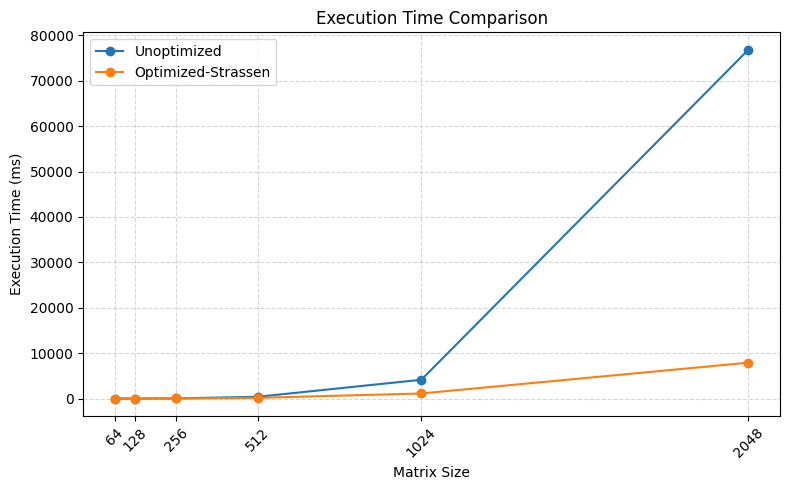

In [30]:
x_values = [64, 128, 256, 512, 1024, 2048]

# Each inner list is a line
y_values = [
    [0.2332, 3.1997, 28.9613, 393.872, 4136.8892, 76819.5566],  # unoptimized execution time mean
    [0.4114, 3.7955, 20.8591, 153.722, 1117.9698, 7898.6682]   # optimized-strassen execution time mean
]

labels = ['Unoptimized', 'Optimized-Strassen']

plot_lines(sizes, y_values, "prueba", labels, 'Execution Time Comparison', 'Matrix Size', 'Execution Time (ms)')
